In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='serif')
plt.rcParams.update({
                      "text.usetex": True,
                      "font.family": "serif",
                      'text.latex.preamble': r'\usepackage{amsmath}',
                      'font.size': 20,
                      'lines.linewidth': 3,
                      'axes.labelsize': 22,  
                      'axes.titlesize': 24,
                      'xtick.labelsize': 20,
                      'ytick.labelsize': 20,
                      'legend.fontsize': 20,
                      'axes.linewidth': 2})

In [10]:
df = pd.read_csv('grf1d_dim_seed_sweep.csv')

data = df[['eps_dim','seed','cov_norm']].pivot(index='seed', columns=['eps_dim'])['cov_norm']
print(data)

axis_labels = [str(i) for i in list(data.columns)]

eps_dim        2         4         8         16        32        64
seed                                                               
0        0.071758  0.048805  0.041786  0.132078  0.019795  0.021888
1        0.062259  0.040823  0.013608  0.026952  0.025866  0.015521
2        0.079858  0.016895  0.026218  0.032377  0.013690  0.008130
3        0.066205  0.043198  0.036671  0.034309  0.035746  0.008893
4        0.073345  0.056628  0.028431  0.024846  0.019483  0.011526
5        0.071003  0.044305  0.029901  0.037518  0.023683  0.033940
6        0.069203  0.025226  0.035097  0.017137  0.013002  0.016809
7        0.091400  0.042949  0.022614  0.028162  0.014156  0.022359
8        0.059478  0.048910  0.011928  0.024745  0.018700  0.020080
9        0.063103  0.056593  0.021978  0.038812  0.025937  0.019270


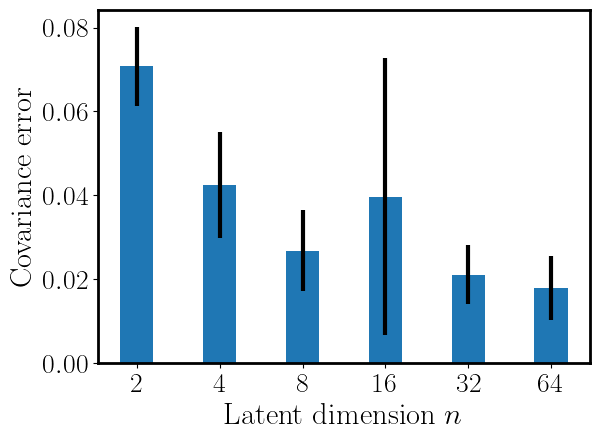

In [16]:

plt.figure()
plt.bar(np.arange(data.shape[1]), data.mean(0), yerr=data.std(0), width=width, label='Linear decoder')
# plt.legend(frameon=False)
plt.xlabel(r'Latent dimension $n$')
plt.ylabel(r'Covariance error')
# plt.yscale('log')
plt.xticks(np.arange(data.shape[1]), axis_labels)
plt.tight_layout()
plt.savefig("grf1d_sweep.png", bbox_inches='tight', dpi=600)
plt.show()




<Figure size 640x480 with 0 Axes>

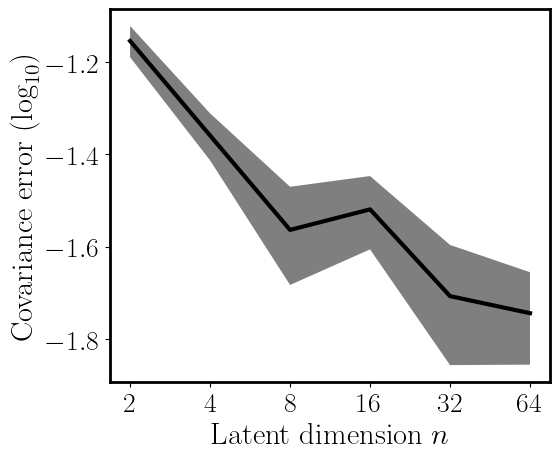

In [9]:
axis_labels = [str(i) for i in list(data.columns)]

mu, std = np.median(data, axis=0), stats.median_abs_deviation(data, axis=0)

dispersion_scale = 1.0
lower = np.log10(np.clip(mu - dispersion_scale*std, a_min=0., a_max = np.inf) + 1e-8)
upper = np.log10(mu + dispersion_scale*std + 1e-8)

fig = plt.figure(figsize=(6,5))
plt.plot(np.arange(6), np.log10(mu), 'k')
plt.fill_between(np.arange(6), lower, upper, facecolor='black', alpha=0.5)
plt.xlabel(r'Latent dimension $n$')
plt.ylabel(r'Covariance error ($\log_{10}$)')
plt.xticks(np.arange(6), axis_labels)
plt.tight_layout()
plt.savefig("grf1d_sweep.png", bbox_inches='tight', dpi=600)
plt.show()
